In [1]:
!pip install -q kaggle


In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=77bfe69a4ed593c60b05187b2b5c89f4059ffb47dba8268acad262ad86f3723d
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Saving kaggle.json to kaggle.json


In [3]:
#!kaggle datasets download -d 'gpiosenka/smoke-fire-f1-score-99-9'
#!kaggle datasets download -d 'instacart-market-basket-analysis'
!kaggle competitions download -c instacart-market-basket-analysis
#!kaggle datasets download -d ritupande/fire-and-smoke-detection-in-cctv-footage
#!unzip "/content/stanford-dogs-dataset.zip"
#kaggle kernels output ritupande/fire-and-smoke-detection-in-cctv-footage -p /path/to/dest

100% 196M/196M [00:07<00:00, 33.1MB/s]
100% 196M/196M [00:07<00:00, 26.1MB/s]


In [4]:
!unzip "/content/instacart-market-basket-analysis.zip"

Archive:  /content/instacart-market-basket-analysis.zip
  inflating: aisles.csv.zip          
  inflating: departments.csv.zip     
  inflating: order_products__prior.csv.zip  
  inflating: order_products__train.csv.zip  
  inflating: orders.csv.zip          
  inflating: products.csv.zip        
  inflating: sample_submission.csv.zip  


In [5]:
import os
import zipfile

source_dir = "/content"
target_dir = "/content/target"

# Loop through all files in the source directory
for file_name in os.listdir(source_dir):
    # Check if the file has a .zip extension
    if file_name.endswith(".zip"):
        # Construct the full path to the source and target files
        zip_file_path = os.path.join(source_dir, file_name)
        target_dir_path = os.path.join(target_dir, os.path.splitext(file_name)[0])

        # Extract the contents of the zip file to the target directory
        with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
            zip_ref.extractall(target_dir_path)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
aisles = pd.read_csv('/content/target/aisles.csv/aisles.csv')
departments = pd.read_csv('/content/target/departments.csv/departments.csv')
order_products_prior = pd.read_csv('/content/target/order_products__prior.csv/order_products__prior.csv')
order_products_train = pd.read_csv('/content/target/order_products__train.csv/order_products__train.csv')
orders = pd.read_csv('/content/target/orders.csv/orders.csv')
products = pd.read_csv('/content/target/products.csv/products.csv')


In [2]:
order_data = pd.merge(orders, order_products_prior, on='order_id')
order_data = pd.merge(order_data, products, on='product_id')



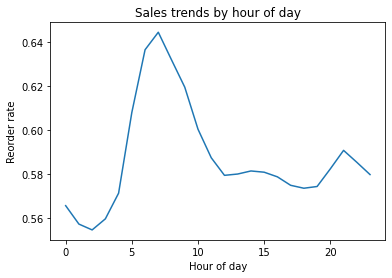

In [3]:
sales_trends = order_data.groupby('order_hour_of_day')['reordered'].mean()
plt.plot(sales_trends)
plt.title('Sales trends by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Reorder rate')
plt.show()



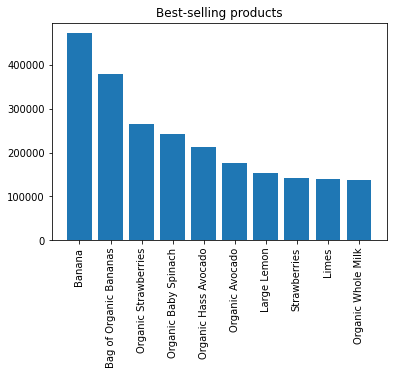

In [4]:
best_selling = order_data.groupby('product_name')['order_id'].count().sort_values(ascending=False)[:10]
plt.bar(best_selling.index, best_selling.values)
plt.title('Best-selling products')
plt.xticks(rotation=90)
plt.show()

